# Fashiongen Dataset

In [1]:
import h5py
import numpy as np

import matplotlib.pyplot as plt

from PIL import Image

---

In [31]:
dataset_h5_filename = '/media/ai/backup/datasets/fashiongen/fashiongen_256_256_validation.h5'

# open the file
file_h5 = h5py.File(dataset_h5_filename, mode='r')

In [44]:
print('number of samples = %d' % (len(file_h5['input_description'])))

print 'Caption of the first sample:'
print(str(file_h5['input_description'][0]))

number of samples = 32528
Caption of the first sample:
['Denim-like jogg jacket in blue. Fading and whiskering throughout. Spread collar. Copper tone button closures at front. Flap pockets at chest with metallic logo plaque. Seam pockets at sides. Cinch tabs at back waistband. Single button sleeve cuffs. Tone on tone stitching.']
['Denim-like jogg jacket in blue. Fading and whiskering throughout. Spread collar. Copper tone button closures at front. Flap pockets at chest with metallic logo plaque. Seam pockets at sides. Cinch tabs at back waistband. Single button sleeve cuffs. Tone on tone stitching.']


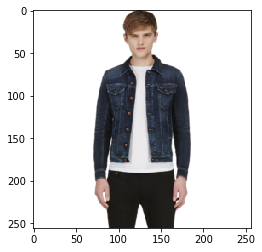

In [42]:
image = Image.fromarray(file_h5['input_image'][0].astype('uint8'), 'RGB')
plt.imshow(image)

---

In [3]:
BATCH_SIZE = 9

In [4]:
def get_batch(file_h5, features, batch_number, batch_size=32):
    """Get a batch of the dataset
    
    Args:
        file_h5(str): path of the dataset
        features(list(str)): list of names of features present in the dataset
            that should be returned.
        batch_number(int): the id of the batch to be returned.
        batch_size(int): the mini-batch size
    Returns:
        A list of numpy arrays of the requested features"""
    list_of_arrays = []
    lb, ub = batch_number * batch_size, (batch_number + 1) * batch_size
    for feature in features:
        list_of_arrays.append(file_h5[feature][lb: ub])
    return list_of_arrays

In [19]:
# define the features to be retrieved
list_of_features = ['input_image', 'input_description']

print('keys:')
list(file_h5.keys())

keys:


[u'index',
 u'index_2',
 u'input_brand',
 u'input_category',
 u'input_composition',
 u'input_concat_description',
 u'input_department',
 u'input_description',
 u'input_gender',
 u'input_image',
 u'input_msrpUSD',
 u'input_name',
 u'input_pose',
 u'input_productID',
 u'input_season',
 u'input_subcategory']

In [6]:
dataset_len = len(file_h5['input_image'])
nb_batches = int(dataset_len / BATCH_SIZE)

print('dataset length =', dataset_len)
print('number of batches =', nb_batches)

('dataset length =', 32528)
('number of batches =', 3614)


In [7]:
#batch_nb = np.random.randint(0, nb_batches)
batch_nb = 1

# get the first batch of the data
list_of_arrays = get_batch(file_h5, list_of_features, batch_nb, BATCH_SIZE)

# close the file
file_h5.close()

---

In [8]:
len(list_of_arrays)

2

In [9]:
# list_of_features = ['input_image', 'input_description']# [0] array of images
# [0] array of images
# [1] array of captions
list_of_arrays[1]

array([['Long sleeve suede jacket in black. Tonal grained leather paneling throughout. Stand collar. Zip closure and zippered welt pockets at front. Zippered vents at back hem. Welt pockets at interior. Fully lined. Tonal stitching. Zippered expansion panels at sleeve cuffs.'],
       ['Long sleeve suede jacket in black. Tonal grained leather paneling throughout. Stand collar. Zip closure and zippered welt pockets at front. Zippered vents at back hem. Welt pockets at interior. Fully lined. Tonal stitching. Zippered expansion panels at sleeve cuffs.'],
       ['Long sleeve suede jacket in black. Tonal grained leather paneling throughout. Stand collar. Zip closure and zippered welt pockets at front. Zippered vents at back hem. Welt pockets at interior. Fully lined. Tonal stitching. Zippered expansion panels at sleeve cuffs.'],
       ['Slim-fit jeans in dark blue. Distressing throughout. Fading at front. Textured black leather logo patch at back waist. Silver-tone metal logo plaque at ba

In [10]:
list_of_arrays[0]

array([[[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        ...,

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],

        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
        

number of images = 9


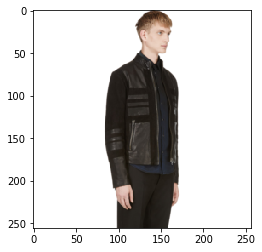

In [41]:
images_arrays = list_of_arrays[0]
print('number of images = %s' % (len(images_arrays)))

image_rgb_arrays = images_arrays[0]
image = Image.fromarray(image_rgb_arrays.astype('uint8'), 'RGB')

plt.imshow(image)

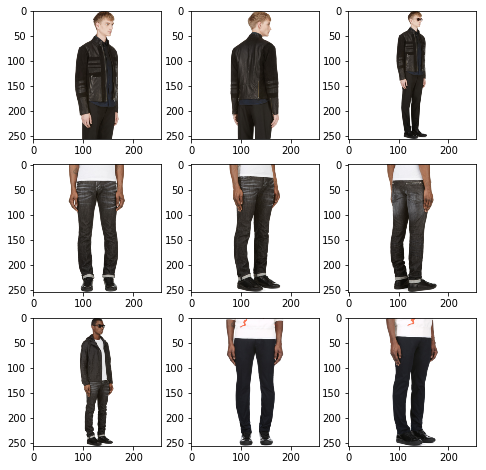

In [12]:
fig=plt.figure(figsize=(8, 8))
columns = 3
rows = 3

for i in range(1, columns*rows +1):
    img = Image.fromarray(images_arrays[i-1].astype('uint8'), 'RGB')
    
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    
plt.show()

---

# Dataset class